### Here in this section we'll need to find our A client will pay off the full loan or not.

#### we've taken a experimental data set for this

In [1]:
# importing the prerquire libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# getting the dataset & viewing it

loan = pd.read_csv('loan_data.csv')
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# visualize the data set & taking care of null values

loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# for null or missing values

loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
# viewing the target values

print(loan.groupby('not.fully.paid').size())

not.fully.paid
0    8045
1    1533
dtype: int64


### Exploretory data analysis

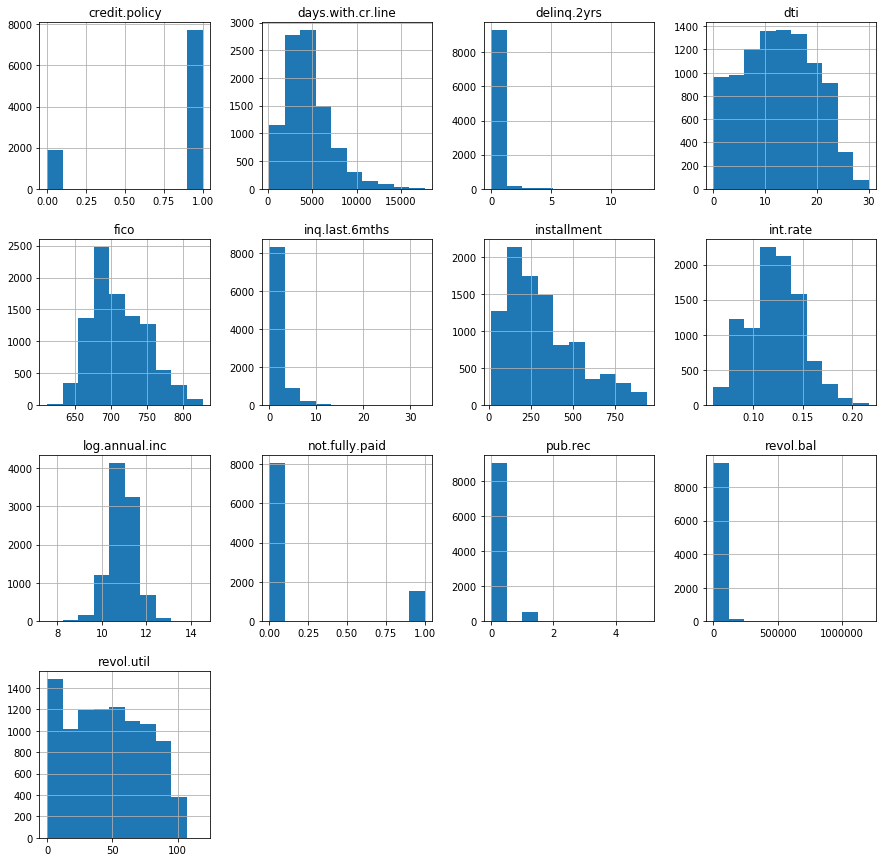

In [7]:
# histagram for all values

h = loan.hist(figsize = (15,15))

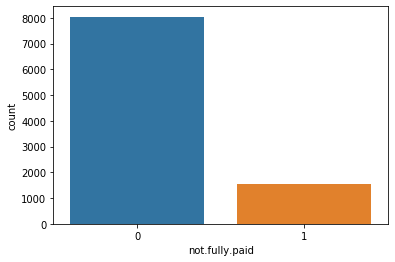

In [8]:
# viewing target values with histagram

t_hist = sns.countplot(x = 'not.fully.paid', data = loan)

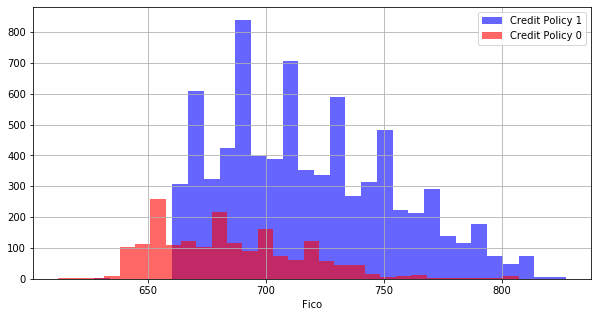

In [9]:
# histagram for credit policy & fico score

plt.figure(figsize = (10,5))
loan[loan['credit.policy'] ==1]['fico'].hist(bins =30, color='blue', label = 'Credit Policy 1', alpha = 0.6)
loan[loan['credit.policy'] ==0]['fico'].hist(bins = 30, color = 'red', label = 'Credit Policy 0', alpha = 0.6)
plt.xlabel('Fico')
plt.legend()

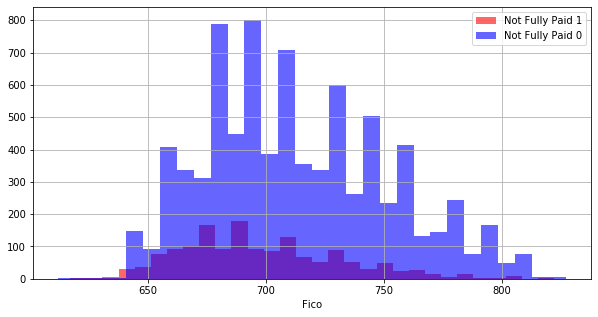

In [10]:
# histagram for fully paid & fico score

plt.figure(figsize = (10,5))
loan[loan['not.fully.paid'] ==1]['fico'].hist(bins =30, color='red', label = 'Not Fully Paid 1', alpha = 0.6)
loan[loan['not.fully.paid'] ==0]['fico'].hist(bins = 30, color = 'blue', label = 'Not Fully Paid 0', alpha = 0.6)
plt.xlabel('Fico')
plt.legend()

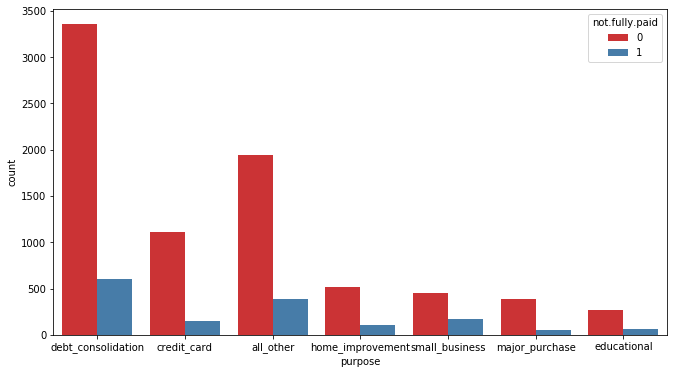

In [11]:
# count plot by purpose of the loan (hue defined by not.fully.paid)

plt.figure(figsize =(11,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loan,palette = 'Set1')

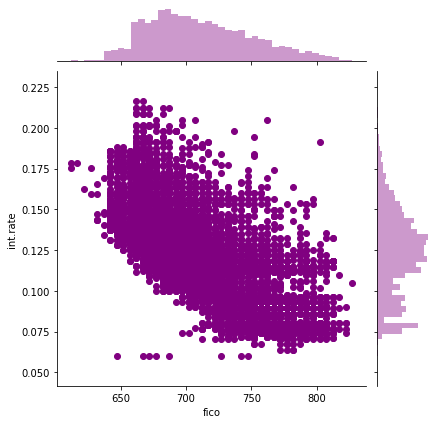

In [12]:
## fico score & interest rate

sns.jointplot(x = 'fico', y = 'int.rate', data = loan, color = 'purple')

<Figure size 792x504 with 0 Axes>

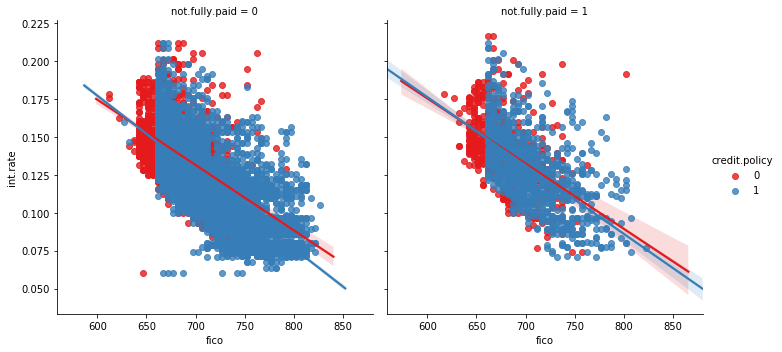

In [13]:
# lmplot for not fully paid & credit policy

plt.figure(figsize = (11,7))
sns.lmplot(y = 'int.rate', x = 'fico', data = loan, hue = 'credit.policy', col = 'not.fully.paid', palette = 'Set1')

In [14]:
# dummy variables for categorical data

cat_feats = ['purpose']
final_data = pd.get_dummies(loan, columns = cat_feats, drop_first = True)

In [15]:
final_data.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [16]:
# finding correlation

corr = final_data.corr()
corr.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245


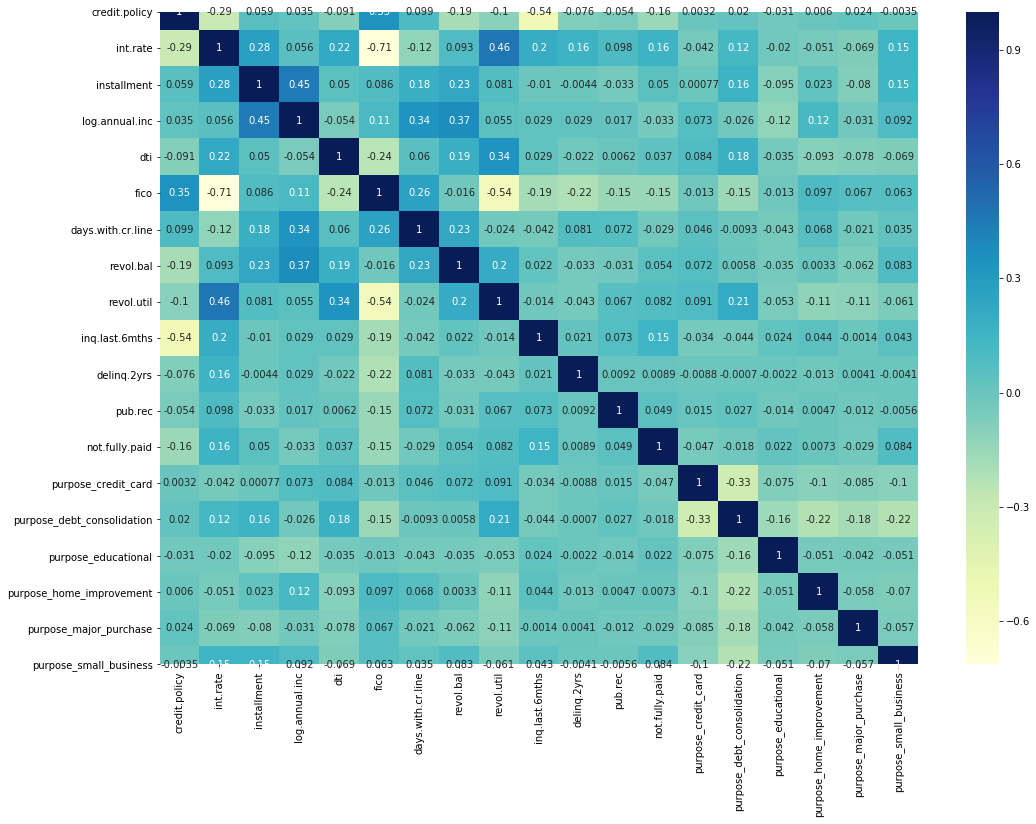

In [17]:
# heat map for correlation of the data

plt.figure(figsize = (17,12))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

In [18]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Modeling with Decision Tree classifier

In [19]:
# diving data into dependent & independent variable or feature or target

x =final_data.drop('not.fully.paid', axis =1)
y= final_data['not.fully.paid']

In [20]:
# spliting dataset into train test & split

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [21]:
# importin decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [22]:
# creating instance for decision tree classifer

dtree = DecisionTreeClassifier()

In [23]:
# fitting dataset to the the instance

dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
# predicting the output

prediction = dtree.predict(x_test)

In [25]:
# importing classification_report & confusion matrix for evaluating the model

from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# classification report
#confusion matrix

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874

[[2000  408]
 [ 370   96]]


In [27]:
# model accuracy 73%

### in this section we use Randomforest for comparing DecisionTree & RandomForest

In [28]:
# importing random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [29]:
# creating instance with n_estimators of 300

rfc = RandomForestClassifier(n_estimators= 300)

In [30]:
# fitting to the instance

rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
# predicting with random forest

predictions = rfc.predict(x_test)

In [32]:
# evaluating
# classification report
# consusion matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.38      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874

[[2395   13]
 [ 458    8]]


In [33]:
# model accuracy 84%